### APS 6

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

%matplotlib inline

## 28.40

### Após implementado o método das diferenças finitas e montado o sistema, é implementado o método de Gauss-Seidel:

In [2]:
#matrix declaration:

m = np.array([    [-2,1,0,0,0,0,0,0,0,-1060],
                  [1,-2,1,0,0,0,0,0,0,-60],
                  [0,1,-2,1,0,0,0,0,0,-60],
                  [0,0,1,-2,1,0,0,0,0,-60],
                  [0,0,0,1,-2,1,0,0,0,-60],
                  [0,0,0,0,1,-2,1,0,0,-60],
                  [0,0,0,0,0,1,-2,1,0,-60],
                  [0,0,0,0,0,0,1,-2,1,-60],
                  [0,0,0,0,0,0,0,1,-2,-60]
              
                       ])

m = m.astype('float64')

In [3]:
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0
x6 = 0
x7 = 0
x8 = 0
x9 = 0

i = 0

respostas1 = [0]

error = 5

while error > 0.0001:
    
    i += 1
    
    x1 = (m[0][9] - m[0][1]*x2 - m[0][2]*x3 - m[0][3]*x4 - m[0][4]*x5 - m[0][5]*x6 - m[0][6]*x7
         - m[0][7]*x8 - m[0][8]*x9) / m[0][0]
    
    respostas1.append(x1)
    
    x2 = (m[1][9] - m[1][0]*x1 - m[1][2]*x3 - m[1][3]*x4 - m[1][4]*x5 - m[1][5]*x6 - m[1][6]*x7
         - m[1][7]*x8 - m[1][8]*x9) / m[1][1]
    
    x3 = (m[2][9] - m[2][0]*x1 - m[2][1]*x2 - m[2][3]*x4 - m[2][4]*x5 - m[2][5]*x6 - m[2][6]*x7
         - m[2][7]*x8 - m[2][8]*x9) / m[2][2]
    
    x4 = (m[3][9] - m[3][0]*x1 - m[3][1]*x2 - m[3][2]*x3 - m[3][4]*x5 - m[3][5]*x6 - m[3][6]*x7
         - m[3][7]*x8 - m[3][8]*x9) / m[3][3]
    
    x5 = (m[4][9] - m[4][0]*x1 - m[4][1]*x2 - m[4][2]*x3 - m[4][3]*x4 - m[4][5]*x6 - m[4][6]*x7
         - m[4][7]*x8 - m[4][8]*x9) / m[4][4]
    
    x6 = (m[5][9] - m[5][0]*x1 - m[5][1]*x2 - m[5][2]*x3 - m[5][3]*x4 - m[5][4]*x5 - m[5][6]*x7
         - m[5][7]*x8 - m[5][8]*x9) / m[5][5]
    
    x7 = (m[6][9] - m[6][0]*x1 - m[6][1]*x2 - m[6][2]*x3 - m[6][3]*x4 - m[6][4]*x5 - m[6][5]*x6
         - m[6][7]*x8 - m[6][8]*x9) / m[6][6]
    
    x8 = (m[7][9] - m[7][0]*x1 - m[7][1]*x2 - m[7][2]*x3 - m[7][3]*x4 - m[7][4]*x5 - m[7][5]*x6 
          - m[7][6]*x7 - m[7][8]*x9) / m[7][7]
    
    x9 = (m[8][9] - m[8][0]*x1 - m[8][1]*x2 - m[8][2]*x3 - m[8][3]*x4 - m[8][4]*x5 - m[8][5]*x6 
          - m[8][6]*x7 - m[8][7]*x8) / m[8][8]
    
    error = math.fabs(100*(x1 - respostas1[i-1])/x1)


print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)
print(x9)

1169.9891270777798
1279.9803306989252
1329.9742525506256
1319.971213476476
1249.971213476476
1119.973962344868
929.9789350945045
679.9854445082875
369.99272225414376


## 28.37

### Gráfico da solução analítica:

In [16]:
t = [0.1*i for i in range(0,200)]
i = [0.5*math.e**(-1.5*T) for T in t]

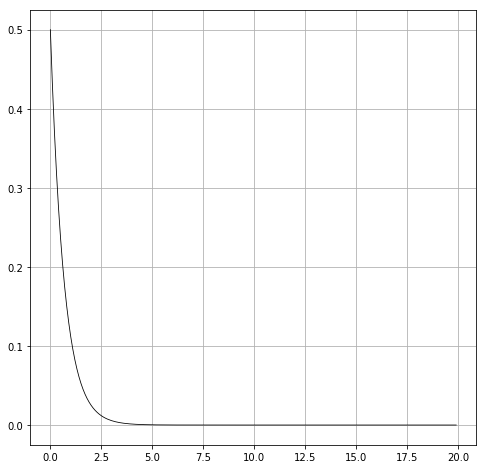

In [17]:
plt.figure(figsize=(8,8))
plt.plot(t,i, color="black", linewidth=0.8)
plt.grid()

### Implementando um método Runge-Kutta de quarta ordem com passo de 0.01, segue-se:

In [4]:
def f(t,y):
    return -1.5*y

In [4]:
def ks(ti, yi, h):
    
    k1 = f(ti,yi)
    
    k2 = f(ti + 0.5*h, yi + 0.5*k1*h)
    
    k3 = f(ti + 0.5*h, yi + 0.5*k2*h)
    
    
    k4 = f(ti + h, yi + k3*h)
    
    return k1, k2, k3, k4, h

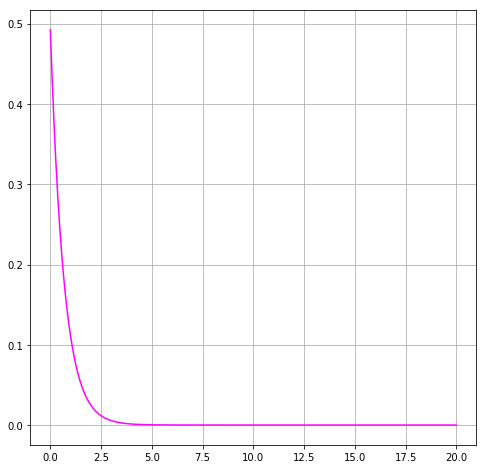

In [11]:
tvals = [0.01*h for h in range(0,2000)]
yvals = []
y = 0.5
#documentação da função: tempo inicial, corrente inicial, PASSO
k1, k2, k3, k4, h = ks(0,0.5,0.01)


for i in range(len(tvals)):
    
    y += (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
    k1, k2, k3, k4, h = ks(tvals[i],y,h)
    #print(tvals[i])
    #print(k1, k2, k3, k4, h)
    yvals.append(y)

    
#print(tvals)
#print(yvals)

plt.figure(figsize=(8,8))
plt.plot(tvals,yvals, color='magenta')
plt.grid()

### Uma vez que este segundo gráfico está exatamente igual ao primeiro (o da solução analítica), pode-se afirmar que o método foi aplicado corretamente.

## 28.36

In [ ]:
### Implementando um método Runge-Kutta de quarta ordem com passo de 0.001, obtém-se o seguinte

In [6]:
def f(t,y):
    return -50*y + math.sin(t*math.sqrt(3.5)) - 0.4

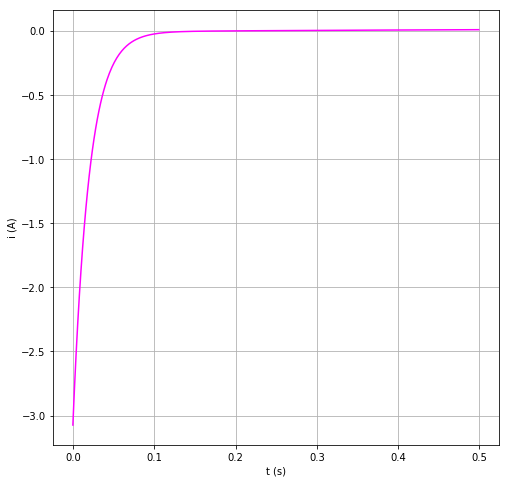

In [11]:
tvals = [0.001*h for h in range(0,500)]
yvals = []
y = -3.231515 #valor inicial da corrente
#documentação da função: tempo inicial, corrente inicial, PASSO
k1, k2, k3, k4, h = ks(0,-3.231515,0.001)


for i in range(len(tvals)):
    
    y += (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
    k1, k2, k3, k4, h = ks(tvals[i],y,h)
    #print(tvals[i])
    #print(k1, k2, k3, k4, h)
    yvals.append(y)

    
#print(tvals)
#print(yvals)

plt.figure(figsize=(8,8))
plt.plot(tvals,yvals, color='magenta')
plt.xlabel('t (s)')
plt.ylabel('i (A)')
plt.grid()